In [199]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
import ergo
from ergo.conditions import IntervalCondition, MaxEntropyCondition
from ergo.distributions.point_density import PointDensity
from ergo.scale import Scale, LogScale
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import logistic
from numpy import trapz

In [201]:
rv = logistic(loc=2.5, scale=0.1)

In [202]:
xs = np.linspace(1, 4, 100)

In [203]:
rv_ps = rv.pdf(xs)
rv_cs = rv.cdf(xs)

In [204]:
dist = PointDensity(xs, rv_ps, LogScale(0.01, 5, 500))
pd_ps = [float(dist.pdf(x)) for x in xs]
pd_cs = [float(dist.cdf(x)) for x in xs]

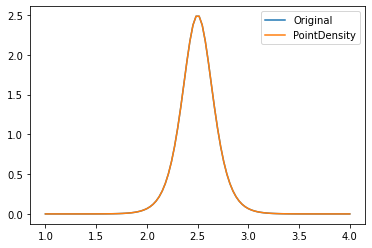

In [205]:
seaborn.lineplot(xs, rv_ps, label="Original")
seaborn.lineplot(xs, pd_ps, label="PointDensity")

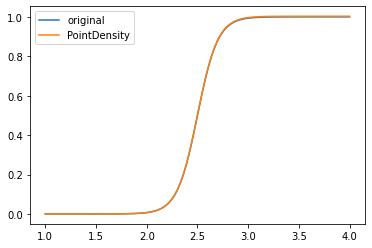

In [206]:
seaborn.lineplot(xs, rv_cs, label="original")
seaborn.lineplot(xs, pd_cs, label="PointDensity")

1.0031401

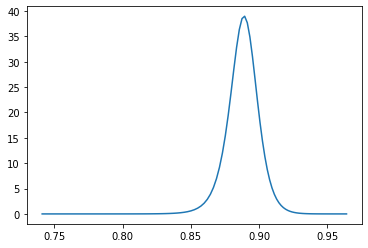

In [207]:
seaborn.lineplot(x=dist.normed_xs, y=dist.normed_densities)
trapz(y=dist.normed_densities, x=dist.normed_xs)

0.9999993835210006

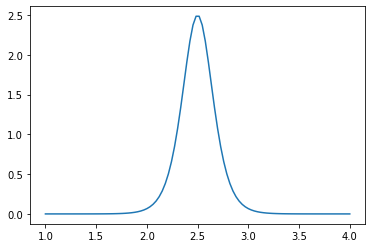

In [208]:
seaborn.lineplot(x=xs, y=rv_ps)
trapz(y=rv_ps, x=xs)

[3.05902154e-06 4.58165687e-06 6.86337307e-06 1.02803870e-05
 1.53982546e-05 2.30639689e-05 3.45466433e-05 5.17450062e-05
 7.75066947e-05 1.16095965e-04 1.73897308e-04 2.60460773e-04
 3.90131958e-04 5.84342401e-04 8.75200785e-04 1.31086109e-03
 1.96320517e-03 2.93990644e-03 4.40236414e-03 6.59174193e-03
 9.86634474e-03 1.47643480e-02 2.20824759e-02 3.30029093e-02
 4.92745638e-02 7.34421089e-02 1.09194830e-01 1.61779627e-01
 2.38409162e-01 3.48570943e-01 5.03759325e-01 7.16183960e-01
 9.94356930e-01 1.33629715e+00 1.71895850e+00 2.09039426e+00
 2.37503767e+00 2.49825120e+00 2.42348194e+00 2.17301536e+00
 1.81548131e+00 1.42955685e+00 1.07436490e+00 7.79358625e-01
 5.51082850e-01 3.82658213e-01 2.62379527e-01 1.78348720e-01
 1.20519705e-01 8.11176598e-02 5.44530824e-02 3.64858806e-02
 2.44188253e-02 1.63281783e-02 1.09131923e-02 7.29101151e-03
 4.87004407e-03 3.25237820e-03 2.17181328e-03 1.45008287e-03
 9.68208595e-04 6.46424829e-04 4.31602151e-04 2.88149051e-04
 1.92374224e-04 1.284339

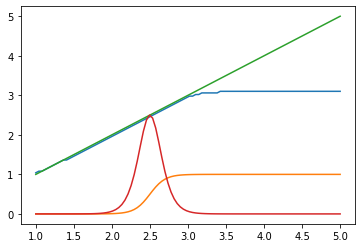

In [209]:
import pytest

scale = LogScale(0.1, 10, 100)

rv = logistic(loc=2.5, scale=0.1)
xs = np.linspace(1, 5, 100)
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)
dist = PointDensity(xs, orig_densities, scale)
dist_densities = np.array([float(dist.pdf(x)) for x in xs])
assert dist_densities == pytest.approx(orig_densities, abs=0.01)
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
# assert dist_cdfs == pytest.approx(orig_cdfs, abs=0.05)    
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs])
# assert dist_ppfs == pytest.approx(xs, abs=0.05)

seaborn.lineplot(x=xs, y=dist_ppfs)
seaborn.lineplot(x=xs, y=orig_cdfs)
seaborn.lineplot(x=xs, y=xs)
seaborn.lineplot(x=xs, y=orig_densities)

In [210]:
scale = LogScale(0.1, 5, 10)

rv = logistic(loc=2.5, scale=0.2)
xs = np.linspace(1, 5, 100)
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)
dist = PointDensity(xs, orig_densities, scale)
dist_densities = np.array([float(dist.pdf(x)) for x in xs])
# assert dist_densities == pytest.approx(orig_densities, abs=0.01)
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
# assert dist_cdfs == pytest.approx(orig_cdfs, abs=0.05)
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs[:50]])
# assert dist_ppfs == pytest.approx(xs, abs=0.1)
# for (x, dist_ppf) in zip(xs[:50], dist_ppfs):
#     print(abs(x - dist_ppf))

Tracing PointDensity condition loss for CrossEntropyCondition:
- Fixed: {'xs': Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>}
- Optim: Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>
- Cond: ((Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=-1/1)>,), ((Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>, Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>, Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>), (Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=-1/1)>, Traced<ShapedArray(int32[], weak_type=True):JaxprTrace(level=-1/1)>)))


Tracing PointDensity condition loss for CrossEntropyCondition:
- Fixed: {'xs': Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>}
- Optim: Traced<ShapedArray(float32[10])>with<JVPTrace(level=1/2)>
  with primal = Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>
       tangent = Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>
- Cond: ((Traced<ShapedArray(float32[], weak_type=Tr

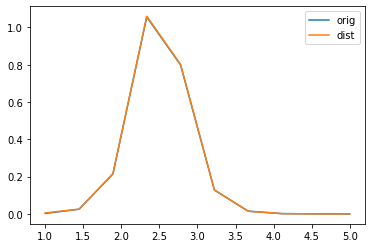

In [211]:
from ergo.conditions import IntervalCondition, MaxEntropyCondition, CrossEntropyCondition

# scale = LogScale(0.1, 5, 2)
scale = Scale(0.1, 5)

rv = logistic(loc=2.5, scale=0.2)
xs = np.linspace(1, 5, 10) ###
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)

direct_dist = PointDensity(xs, orig_densities, scale)
condition = CrossEntropyCondition(p_dist=direct_dist)

# import jax
# with jax.disable_jit():
dist = PointDensity.from_conditions([condition], fixed_params={"xs": xs}, scale=scale)

dist_densities = np.array([float(dist.pdf(x)) for x in xs])
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs[10:50]])

seaborn.lineplot(x=xs, y=orig_densities, label="orig")
seaborn.lineplot(x=xs, y=dist_densities, label="dist")